In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
a.mean()

23.75

In [4]:
b.mean()

27.916666666666668

In [5]:
d = b.mean() - a.mean()
d

4.166666666666668

In [6]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [8]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [9]:
print(sales)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [23. 21. 19. 24. 35. 17. 18. 24. 33. 27. 21. 23. 31. 28. 19. 24. 32. 27.
  16. 41. 23. 32. 29. 33.]]


In [10]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [11]:
np.random.shuffle(sales_t)

In [12]:
sales_t

array([[ 1., 19.],
       [ 1., 32.],
       [ 0., 24.],
       [ 0., 23.],
       [ 0., 21.],
       [ 1., 23.],
       [ 0., 21.],
       [ 0., 27.],
       [ 1., 28.],
       [ 0., 18.],
       [ 0., 35.],
       [ 0., 24.],
       [ 0., 17.],
       [ 0., 19.],
       [ 0., 23.],
       [ 1., 27.],
       [ 1., 41.],
       [ 1., 29.],
       [ 1., 33.],
       [ 1., 32.],
       [ 1., 31.],
       [ 1., 24.],
       [ 1., 16.],
       [ 0., 33.]])

In [13]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0])

In [14]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
print(experiment_data)

[[ 0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.
   0.  1.  1.  1.  1.  0.]
 [19. 32. 24. 23. 21. 23. 21. 27. 28. 18. 35. 24. 17. 19. 23. 27. 41. 29.
  33. 32. 31. 24. 16. 33.]]


In [15]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 0., 19.],
       [ 1., 32.],
       [ 0., 24.],
       [ 1., 23.],
       [ 1., 21.],
       [ 0., 23.],
       [ 0., 21.],
       [ 1., 27.],
       [ 1., 28.],
       [ 1., 18.],
       [ 0., 35.],
       [ 0., 24.],
       [ 1., 17.],
       [ 0., 19.],
       [ 0., 23.],
       [ 0., 27.],
       [ 0., 41.],
       [ 1., 29.],
       [ 0., 33.],
       [ 1., 32.],
       [ 1., 31.],
       [ 1., 24.],
       [ 1., 16.],
       [ 0., 33.]])

In [16]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([32., 23., 21., 27., 28., 18., 17., 29., 32., 31., 24., 16.])

In [17]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

26.833333333333332

In [18]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

24.833333333333332

In [19]:
np.empty([10,1])

array([[nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [20]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [21]:
e1 = sh_exp(1000)

In [22]:
print(e1)

[[-1.98601399]
 [ 1.48251748]
 [ 2.6875    ]
 [ 1.        ]
 [ 0.1958042 ]
 [-6.8125    ]
 [ 0.86713287]
 [ 0.97142857]
 [-3.83216783]
 [ 2.75      ]
 [-0.62222222]
 [-3.66666667]
 [-4.51428571]
 [-0.33333333]
 [ 2.28571429]
 [-0.53146853]
 [-3.66666667]
 [-0.57142857]
 [-4.66666667]
 [ 1.98601399]
 [ 2.16666667]
 [ 4.71111111]
 [ 3.125     ]
 [ 2.16666667]
 [ 1.68888889]
 [-1.48571429]
 [-0.08888889]
 [-0.3125    ]
 [ 2.        ]
 [ 0.30769231]
 [-5.2       ]
 [-0.30769231]
 [ 1.87412587]
 [-1.68888889]
 [ 0.11428571]
 [-4.17777778]
 [-0.1958042 ]
 [-4.05594406]
 [ 0.26666667]
 [ 2.45714286]
 [ 1.16666667]
 [ 0.1958042 ]
 [ 0.81118881]
 [-2.83333333]
 [ 2.4       ]
 [-3.48571429]
 [-0.8125    ]
 [-2.58823529]
 [-1.08571429]
 [-0.26666667]
 [ 1.48251748]
 [-1.94285714]
 [-0.81118881]
 [ 0.33333333]
 [-1.87412587]
 [-1.51111111]
 [ 1.86666667]
 [ 2.04195804]
 [ 0.74285714]
 [ 0.57142857]
 [-5.9020979 ]
 [ 0.22857143]
 [-1.15555556]
 [ 2.97142857]
 [ 6.0625    ]
 [-0.875     ]
 [ 1.15555

In [23]:
len(e1[e1 >= d])

65

In [1]:
65 / 1000 * 100

6.5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

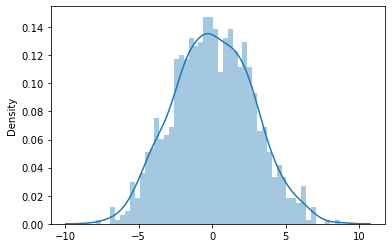

In [25]:
sns.distplot(e1, bins=50)

In [26]:
# Masoud Kaviani